# Homework 6

### Problem 1

Plot the MDF of Rocha Pinto & Maciel (1996, RPM96) and Haywood (2001, H01) including error
bars in both MDFs. You can estimate errors in RPM96 using Ntotal = 287 and error = √N. Give one
possible explanation for the peak at lower metallicity of RPM96 compared to the MDF by H01. Notice
that the MDF by H01 is in percentage, so you must divide it by 100.

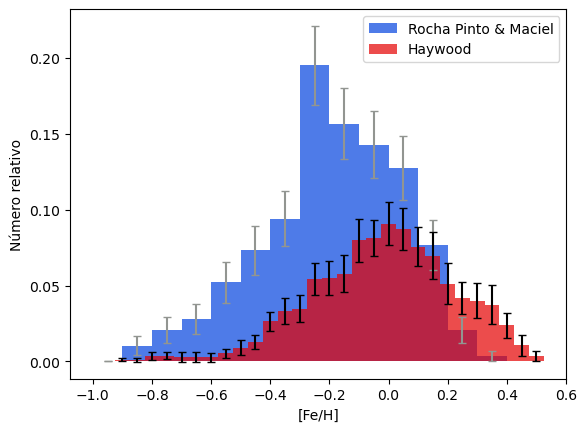

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

rpm=pd.read_csv('rpm.csv')
haywood=pd.read_csv('haywood.csv')

rpm['N']=rpm['N/Ntotal']*287
rpm['N_error']=np.sqrt(rpm['N'])/287

haywood['N']=haywood['percentage']/(100*2)
haywood['N_error']=haywood['percentage_error']/200

plt.bar(rpm['RPM96_[Fe/H]'], rpm['N/Ntotal'], width=0.1, align='center', facecolor='xkcd:blue', alpha=0.7,label='Rocha Pinto & Maciel')
plt.bar(haywood['[Fe/H]'], haywood['N'], width=0.05, align='center', facecolor='xkcd:red', alpha=0.7, label='Haywood')
plt.errorbar(rpm['RPM96_[Fe/H]'], rpm['N/Ntotal'], yerr=rpm['N_error'], linestyle='', color='xkcd:grey', capsize=3)
plt.errorbar(haywood['[Fe/H]'], haywood['N'], yerr=haywood['N_error'], linestyle='', color='xkcd:black', capsize=3)
plt.xlabel('[Fe/H]')
plt.ylabel('Número relativo')
plt.legend()

In [26]:
haywoodcum=np.cumsum(haywood['N'])
rpmcum=np.cumsum(rpm['N'])
print(haywoodcum)

0     0.00115
1     0.00230
2     0.00570
3     0.00940
4     0.01225
5     0.01520
6     0.01790
7     0.02340
8     0.03240
9     0.04530
10    0.07185
11    0.10490
12    0.13970
13    0.19400
14    0.24905
15    0.30695
16    0.38675
17    0.46835
18    0.55925
19    0.64640
20    0.72195
21    0.79170
22    0.84280
23    0.88480
24    0.92490
25    0.96240
26    0.98610
27    0.99665
28    1.00000
Name: N, dtype: float64
